## First Neural Network Example Regression

In [13]:
import numpy as np

In [14]:
def sigmoid(X):
    return 1/(1+(np.e**-X))

In [15]:
def forward(X, W, b, activation=True):
    
    if activation:
        return sigmoid(np.dot(X,W) + b)
    
    else:
        return np.dot(X,W) + b
    

In [3]:
50x3

3x1

==

50x1

SyntaxError: invalid decimal literal (89132990.py, line 1)

In [8]:
def loss_val(Y,P):
    
    return 1/2*(Y-P)**2

In [16]:
def deriv(func, a, delta_x=0.001):
    
    return (func(a+delta_x) - func(a-delta_x)) / (delta_x*2)

In [17]:
# X = np.random.rand(3, 3) #3 samples x 3 features
# Y = np.random.rand(3,1) #label for each 3 samples (3x1)

In [18]:
import pandas as pd
data = pd.read_csv("boston.csv", index_col=0)

In [19]:
X = data.iloc[:,:13].values
Y = data.iloc[:,13].values.reshape(-1,1)

In [13]:
W1 = np.random.rand(X.shape[1],1) #weight for each feature (3x1)
b1 = np.random.rand(1,1) #one value to add to X*W (1x1)

W2 = np.random.rand(1,1) #one weight for the (1x1) output of O1
b2 = np.random.rand(1,1) #another unique value to add to O1*W2

In [14]:
M1 = np.dot(X,W1) #(3x3) * (3x1) = (3x1)
N1 = M1 + b1 #(3x1) + (3x1) = (3x1)

In [15]:
# N1

In [16]:
O1 = sigmoid(N1) #apply non-linear function (3x1 shape remains equal)

In [17]:
# O1

In [18]:
M2 = np.dot(O1,W2) #(3,1) * (1,1) = (3x1) same shape

In [19]:
P = M2 + b2 #(3x1) + (1,1) = (3x1 shape remains equal)

In [20]:
# P

In [21]:
L = 1/2*((Y-P)**2) #1/2(((3x1)-(3x1))**2) = (3x1) same shape

In [22]:
L

array([[ 269.72100464],
       [ 216.85886642],
       [ 575.48303754],
       [ 532.22437933],
       [ 627.49687393],
       [ 389.92769199],
       [ 244.77752462],
       [ 346.52626651],
       [ 123.6518227 ],
       [ 164.27396092],
       [ 101.18798631],
       [ 164.27396092],
       [ 218.94645551],
       [ 192.58779731],
       [ 151.83083727],
       [ 182.89985184],
       [ 249.2227028 ],
       [ 139.87771362],
       [ 188.68261912],
       [ 151.83083727],
       [  82.25173901],
       [ 177.20708457],
       [ 104.05316449],
       [  94.20004085],
       [ 109.90352086],
       [  86.14450629],
       [ 125.22941179],
       [  98.36280812],
       [ 155.33601546],
       [ 204.54333186],
       [  71.11343718],
       [  94.20004085],
       [  77.20138264],
       [  75.96379355],
       [  80.97414992],
       [ 164.27396092],
       [ 184.81744094],
       [ 204.54333186],
       [ 286.22412828],
       [ 450.77706293],
       [ 582.28821572],
       [ 333.488

In [23]:
L.mean()

278.9302310736749

In [24]:
dL_dP = -(Y-P)

In [25]:
dP_dM2, dP_db2 = np.ones_like(M2), np.ones_like(b2)

In [26]:
dL_dM2, dL_db2 = (dL_dP*dP_dM2), (dL_dP*dP_db2).sum(axis=0)

In [27]:
dM2_dO1, dM2_dW2 = np.transpose(W2, (1,0)), np.transpose(O1, (1,0))

In [28]:
dL_dW2 = np.dot(dM2_dW2, dL_dP)

In [29]:
dL_dO1 = np.dot(dL_dM2, dM2_dO1)

In [30]:
dO1_dN1 = (np.e**-N1)/(1+np.e**-N1)**2

In [31]:
dL_dN1 = (dL_dO1*dO1_dN1)

In [32]:
dN1_dM1, dN1_db1 = np.ones_like(M1), np.ones_like(b1)

In [33]:
dL_db1 = (dL_dN1*dN1_db1).sum(axis=0)

In [34]:
dL_dM1 = dL_dN1 * dN1_dM1

In [35]:
dM1_dW1 = np.transpose(X, (1,0))

In [36]:
dL_dW1 = np.dot(dM1_dW1, dL_dM1)

In [37]:
dL_dW1, dL_db1,dL_dW2, dL_db2

(array([[-7.56036861e-175],
        [-5.02796641e-219],
        [-2.82902410e-173],
        [-1.16337771e-186],
        [-1.71856604e-174],
        [-2.11681067e-173],
        [-2.82241423e-172],
        [-8.97190622e-174],
        [-1.65246735e-173],
        [-1.26909492e-171],
        [-6.90731351e-173],
        [-2.33989376e-172],
        [-3.51314558e-173]]),
 array([-3.30493469e-174]),
 array([[-11009.9008082]]),
 array([-11009.9008082]))

In [38]:
W1

array([[0.25581605],
       [0.84444179],
       [0.31936471],
       [0.58800724],
       [0.74352967],
       [0.17800538],
       [0.46516719],
       [0.58010412],
       [0.39648109],
       [0.75324429],
       [0.42418572],
       [0.77018786],
       [0.05689602]])

In [39]:
L.mean()

278.9302310736749

In [40]:
for w in range(W1.shape[0]):

    W1[w] -= dL_dW1[w]*0.001

b1 -= dL_db1*0.001

W2 -= dL_dW2*0.001
b2 -= dL_db2*0.001



M1 = np.dot(X,W1) #(3x3) * (3x1) = (3x1)
N1 = M1 + b1 #(3x1) + (3x1) = (3x1)



O1 = sigmoid(N1) #apply non-linear function (3x1 shape remains equal)



M2 = np.dot(O1,W2) #(3,1) * (1,1) = (3x1) same shape

P = M2 + b2 #(3x1) + (1,1) = (3x1 shape remains equal)



L = 1/2*((Y-P)**2) #1/2(((3x1)-(3x1))**2) = (3x1) same shape

In [41]:
L.mean()

42.24386582331413

In [42]:
sigmoid(0.50)

0.6224593312018546

In [43]:
b1

array([[0.97523445]])

In [44]:
# for w in range(W1.shape[0]):

#     W1[w] -= dL_dW1[w]*0.001

# b1 -= dL_db1*0.001

# W2 -= dL_dW2*0.001
# b2 -= dL_db2*0.001



# M1 = np.dot(X,W1) #(3x3) * (3x1) = (3x1)
# N1 = M1 + b1 #(3x1) + (3x1) = (3x1)

# N1

# O1 = sigmoid(N1) #apply non-linear function (3x1 shape remains equal)

# O1

# M2 = np.dot(O1,W2) #(3,1) * (1,1) = (3x1) same shape

# P = M2 + b2 #(3x1) + (1,1) = (3x1 shape remains equal)

# P

# L = 1/2*((Y-P)**2) #1/2(((3x1)-(3x1))**2) = (3x1) same shape

# 0.26533028 > 0.26327003

# 0.14987436 > 0.14831557

# 0.14831557 > 0.11183451

In [45]:


W1 = np.random.rand(X.shape[0],1)
b1 = np.random.rand(1,1)
W2 = np.random.rand(1,1) 
b2 = np.random.rand(1,1)

M1 = np.dot(X,W1) 
N1 = M1 + b1 
O1 = sigmoid(N1)
M2 = np.dot(O1,W2) 
P = M2 + b2


ValueError: shapes (506,13) and (506,1) not aligned: 13 (dim 1) != 506 (dim 0)

In [20]:
def backward(X_batch, Y_batch, W1, b1, W2, b2):

    #run forward pass
    M1 = np.dot(X_batch,W1) 
    N1 = M1 + b1 
    O1 = sigmoid(N1)
    M2 = np.dot(O1,W2) 
    P = M2 + b2
    L = 1/2*((Y_batch-P)**2)
    
    #compute partial derivatives
    dL_dP = -1*(Y_batch-P)

    dP_dM2, dP_dB2 = np.ones_like(M2), np.ones_like(b2)

    dL_dM2, dL_db2 = (dL_dP*dP_dM2), (dL_dP*dP_dB2).sum(axis=0)

    dM2_dO1, dM2_dW2 = np.transpose(W2, (1,0)), np.transpose(O1, (1,0))

    dL_dW2 = np.dot(dM2_dW2, dL_dP)

    dL_dO1 = np.dot(dL_dM2, dM2_dO1)

    dO1_dN1 = (np.e**-N1)/(1+np.e**-N1)**2
    
    dL_dN1 = (dL_dO1*dO1_dN1)

    dN1_dM1, dN1_db1 = np.ones_like(M1), np.ones_like(b1)

    dL_db1 = (dL_dN1*dN1_db1).sum(axis=0)

    dL_dM1 = dL_dN1 * dN1_dM1

    dM1_dW1 = np.transpose(X_batch, (1,0))

    dL_dW1 = np.dot(dM1_dW1, dL_dM1)
    
    return dL_dW2, dL_db2, dL_dW1, dL_db1
    
    
    

In [21]:
def permute_data(X, Y):
    perm = np.random.permutation(X.shape[0])
    return X[perm], Y[perm]

In [22]:
def generate_batch(X,Y, start, batch_size):
    
    return X[start:start+batch_size], Y[start:start+batch_size]


In [23]:
def generate_batch(X, 
                   y,
                   start: int = 0,
                   batch_size: int = 10):
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and Y must be 2 dimensional"

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
    
    return X_batch, y_batch

In [24]:
def train_nn(X, Y, n_epochs, batch_size=20):
    
    #initialize parameters
    W1 = np.random.rand(X.shape[1],1)
    b1 = np.random.rand(1,1)
    W2 = np.random.rand(1,1) 
    b2 = np.random.rand(1,1)

    X, Y = permute_data(X, Y)
    X_batch, Y_batch = X, Y

    start = 0
    
    losses = []
    
    for epoch in range(n_epochs):
        if start >= X.shape[0]:
            X, y = permute_data(X, Y)
            start = 0
        
        # generate batch of data
        X_batch, Y_batch = generate_batch(X,Y, start=start,
                                          batch_size=batch_size)
        start += batch_size
    
        
        #forward pass
        M1 = np.dot(X_batch,W1) 
        N1 = M1 + b1 
        O1 = sigmoid(N1)
        M2 = np.dot(O1,W2) 
        P_batch = M2 + b2
        L = 1/2*((Y_batch-P_batch)**2)
        
        #backward pass
        W2_g, b2_g, W1_g, b1_g = backward(X_batch, Y_batch,
                                         W1=W1, b1=b1,
                                         W2=W2, b2=b2)
        #update parameters
#         print("--")
#         print(f"W1 {W1.shape}, W1_g {W1_g.shape}")
#         print(f"b1 {b1.shape}, b1_g {b1_g.shape}")
        
#         print(f"W2 {W2.shape}, W2_g {W2_g.shape}")
#         print(f"b2 {b2.shape}, b2_g {b2_g.shape}")
#         print("--")
        
        W2 -= W2_g*0.001
        b2 -= b2_g*0.001
        
        for weight in range(X.shape[1]):
            W1[weight] -= W1_g[weight]*0.001
        
        b1 -= b1_g*0.001
        
        
        #print loss
        # print(f"Epoch {epoch}, loss={np.mean(L, axis=0)}")
        
        # if epoch % 100 == 0:
        #     losses.append(np.mean(L, axis=0))
        losses.append(np.mean(L, axis=0))


        
        
    return losses, W1, b1, W2, b2
        

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("boston.csv", index_col=[0])

In [27]:
X = df.drop(columns="Price").values
Y = df[["Price"]].values

In [28]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [29]:
X = data[:,:13]
Y = data[:,13].reshape(-1,1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [32]:
losses, W1, b1, W2, b2 = train_nn(X, Y, n_epochs=10000, batch_size=23)

In [33]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [34]:
def n(x):
    
    return 1/(1+np.e**-x)

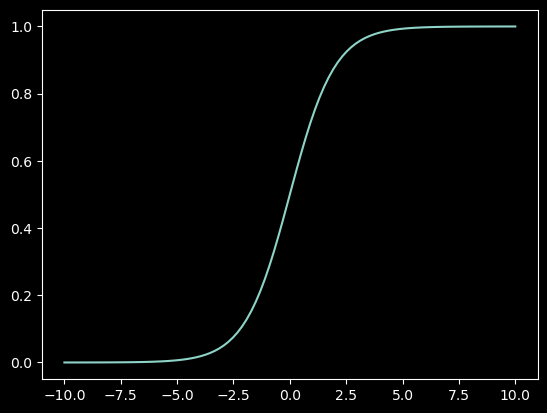

In [35]:
plt.plot(np.linspace(-10,10, 100), sigmoid(np.linspace(-10,10, 100)));

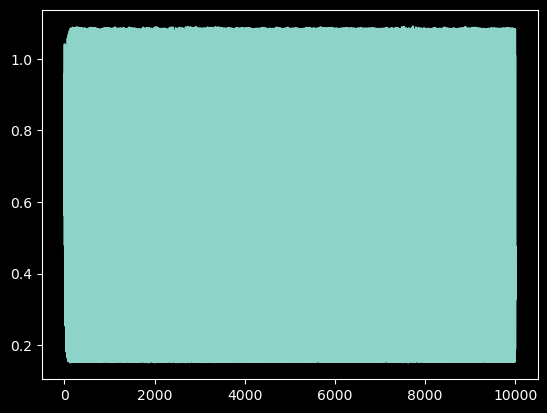

In [36]:
plt.plot(losses);

In [37]:
M1 = np.dot(X,W1) 
N1 = M1 + b1 
O1 = sigmoid(N1)
M2 = np.dot(O1,W2) 
P_batch = M2 + b2

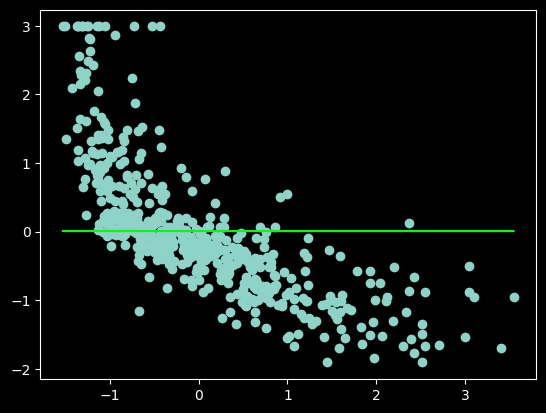

In [38]:
plt.scatter(X[:,12], Y);
plt.plot(X[:,12], P_batch, color="lime");

In [39]:
def mae(preds, actuals):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds, actuals):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

ValueError: x and y must be the same size

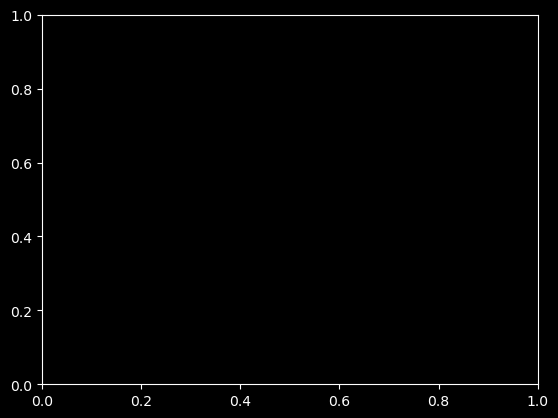

In [40]:
plt.scatter(X,Y)
plt.plot(X, P_batch);

In [ ]:
mae(P_batch, Y)

In [ ]:
rmse(P_batch, Y)

In [282]:
(Y-P_batch).sum()

-76.04745927059491

In [529]:
X = np.arange(1, 10, 1).reshape(-1,1)
Y = np.power(X, 2)

In [530]:
losses, W1, b1, W2, b2 = train_nn(X, Y, n_epochs=10000, batch_size=23)

In [531]:
np.dot(np.maximum(0, np.dot(X, W1) + b1), W2) + b2

array([[ 88.92075425],
       [129.06788183],
       [169.21500941],
       [209.36213699],
       [249.50926456],
       [289.65639214],
       [329.80351972],
       [369.95064729],
       [410.09777487]])

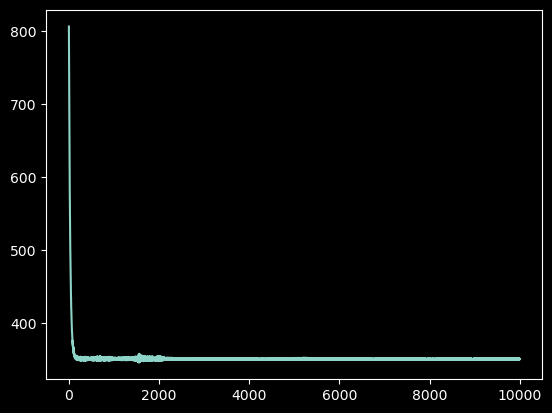

In [532]:
plt.plot(losses);

In [534]:
predict(X, W1, b1, W2, b2)

array([[31.54090954],
       [31.67225186],
       [31.6822509 ],
       [31.68300571],
       [31.68306266],
       [31.68306695],
       [31.68306728],
       [31.6830673 ],
       [31.6830673 ]])

In [ ]:
mae()

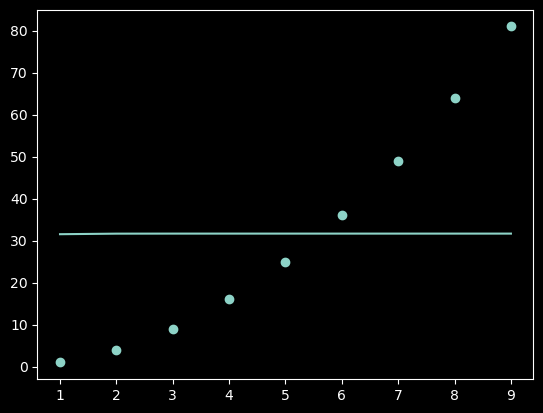

In [535]:
plt.scatter(X, Y);
plt.plot(X, predict(X, W1, b1, W2, b2));

In [130]:
def predict(X, W1, b1, W2, b2):
    
    M1 = np.dot(X,W1) 
    N1 = M1 + b1 
    O1 = sigmoid(N1)
    M2 = np.dot(O1,W2) 
    P = M2 + b2
    
    return P

In [131]:
predict(X, W1, b1, W2, b2)

array([[22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22.53280632],
       [22

In [207]:
def backward(X, Y, W1, b1, W2, b2):
    
#     W1 = np.random.rand(X.shape[1], 1)
#     b1 = np.random.rand(1,1)
    
#     #the resultant shape of o1 will be X.shape[0],1
#     W2 = np.random.rand(1,1)
#     b2 = np.random.rand(1,1)
    assert X.shape[1] == W1.shape[0]
    #values
    M1 = np.dot(X, W1)
    N1 = M1 + b1
    O1 = sigmoid(N1)
    
    M2 = np.dot(O1, W2)
    P = M2 + b2
    
    L = 1/2*((Y-P)**2)
    #derivatives
    def loss(P):
        return 1/2*(Y-P)**2
    
    dL_dP = deriv(loss, a=P)
    dP_db2 = np.ones_like(b2)
    #ya tenemos
    dL_db2 = (dL_dP*dP_db2).sum(axis=0)
    
    dP_dM2 = np.ones_like(M2)
    dL_dM2 = dL_dP*dP_dM2
    
    dM2_dW2 = np.transpose(O1, (1,0))
    #ya tememps (comprobando orden correcto dimensiones)
    dL_dW2 = np.dot(dM2_dW2, dL_dP)
    #
    dM2_dO1 = np.transpose(W2, (1,0))
    
    dL_dO1 = np.dot(dL_dM2, dM2_dO1)
    
    dO1_dN1 = deriv(sigmoid, N1)
    
    dL_dN1 =  dL_dO1*dO1_dN1#para compactar
    dN1_db1 = (np.ones_like(b1))
    #ya tenemos
    dL_db1 = (dL_dN1*dN1_db1).sum(axis=0)
    
    dN1_M1 = np.ones_like(b1)
    
    dL_dM1 = dL_dN1*dN1_M1

    
    dM1_dW1 = np.transpose(X, (1,0))
    dL_dW1 = np.dot(dM1_dW1,dL_dM1)

    # print(dL_dN1.shape)
    # print(dN1_M1.shape)
    # print(dM1_dW1.shape)
    # #ya tenemos
    # # dL_dW1 = np.dot(dN1_M1, dM1_dW1) * (dO1_dN1*dM2_dO1*dP_dM2*dL_dP)
    # print(f"dN1_M1: {dN1_M1.shape}")
    # print(f"dM1_dW1: {dM1_dW1.shape}")
    
    #     print(f"dL_dP: {dL_dP.shape}")
#     print(f"dP_dM2: {dP_dM2.shape}")
#     print(f"dM2_dO1: {dM2_dO1.shape}")
#     print(f"dO1_dN1: {dO1_dN1.shape}")
#     print(f"dN1_M1: {dN1_M1.shape}")
#     print(f"dM1_dW1: {dM1_dW1.shape}")


#     print(dL_dB1.sum(axis=0))
    
    return dL_dW1, dL_db1, dL_dW2, dL_db2
    
    

In [204]:
X = np.random.rand(50,3)
Y = np.random.rand(50,1)

In [296]:
def train(X, Y):
    
    W1 = np.random.rand(X.shape[1],1)
    b1 = np.random.rand(1,1)
    
    W2 = np.random.rand(1,1)
    b2 = np.random.rand(1,1)
    
    losses = np.zeros((40,1))
    
    size = 20
    start = 0
    for i in range(40):
        #forward pass
        if start >= X.shape[0]:

            start=0
        
        X_batch = X[start:start+size]
        Y_batch = Y[start:start+size]
        
        P_batch = forward(X=forward(X_batch, W1, b1),
                   W=W2, b=b2, activation=False)

        #compute error
        error = loss_val(Y_batch,P_batch)

        #backward pass
        w1_g, b1_g, w2_g, b2_g = backward(X_batch, P_batch, W1, b1, W2, b2)
    
        #update parameters
        for weight in range(0, X_batch.shape[1]):
            W1[weight] -= w1_g[weight]*0.001

        W2 -= w2_g*0.001
        b1 -= b1_g*0.001
        b2 -= b2_g*0.001
        
        # losses[i] = np.array([error.mean()])
        print(error)
        start+=size
        
    return W1, b1, W2, b2, losses

In [297]:
data = pd.read_csv("boston.csv", index_col=[0])

In [298]:
df = sns.load_dataset("car_crashes")

In [299]:
X = df[["alcohol"]].values

In [300]:
Y = df[["total"]].values

In [301]:
W1, b1, W2, b2, losses = train(X,Y)

[[167.19382568]
 [154.6560533 ]
 [163.56170669]
 [239.50235574]
 [ 66.00939607]
 [ 85.6558767 ]
 [ 52.92579738]
 [123.03892583]
 [ 14.59723142]
 [151.14635209]
 [113.82979864]
 [144.25863701]
 [109.33354882]
 [ 75.49165553]
 [ 97.82891225]
 [115.34277693]
 [149.43155301]
 [218.1293269 ]
 [199.71750992]
 [106.3941398 ]]
[[ 71.85814352]
 [ 29.58389636]
 [ 92.32074417]
 [ 41.33698931]
 [145.97215821]
 [121.4674138 ]
 [218.10503186]
 [103.48638064]
 [100.63608591]
 [ 61.48892964]
 [ 57.14671341]
 [159.96810976]
 [ 69.49342215]
 [132.6259106 ]
 [273.44387411]
 [ 92.30246256]
 [187.91240754]
 [ 75.52275968]
 [156.40204469]
 [ 56.05023566]]
[[273.44395972]
 [178.33976529]
 [180.23905969]
 [178.3361289 ]
 [ 58.32577105]
 [ 85.64799292]
 [ 74.29446121]
 [ 50.89881183]
 [271.1164075 ]
 [ 88.27526401]
 [142.57373294]]
[[167.19382568]
 [154.6560533 ]
 [163.56170669]
 [239.50235574]
 [ 66.00939607]
 [ 85.6558767 ]
 [ 52.92579738]
 [123.03892583]
 [ 14.59723142]
 [151.14635209]
 [113.82979864]
 [144

In [258]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

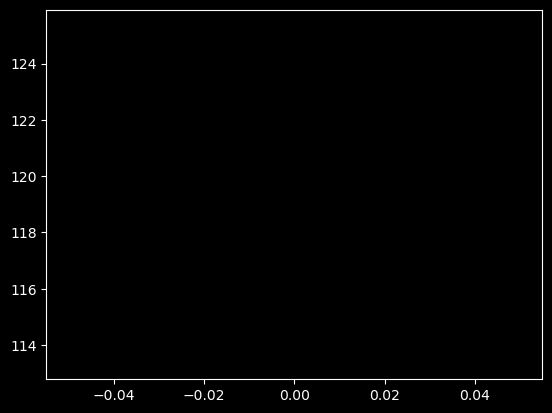

In [259]:
plt.plot(losses);

In [223]:
def predict(X):
    o1 = forward(X, W1, b1)
    
    return forward(o1, W2, b2, activation=False)
                  
    

In [224]:
preds = predict(X)

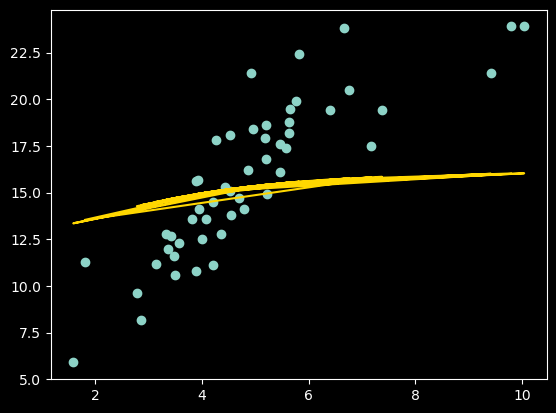

In [225]:
plt.scatter(X, Y);
plt.plot(X, preds, color="gold");

In [226]:
import pandas as pd

In [227]:
data = pd.read_csv("boston.csv", index_col=[0])

In [228]:
X = data.drop(columns=["Price"]).values
Y = data[["Price"]].values

In [241]:
perm = np.random.permutation(X.shape[0])

In [246]:
X = X[perm]
Y = Y[perm]

In [247]:
W1, b1, W2, b2, losses = train(X,Y)

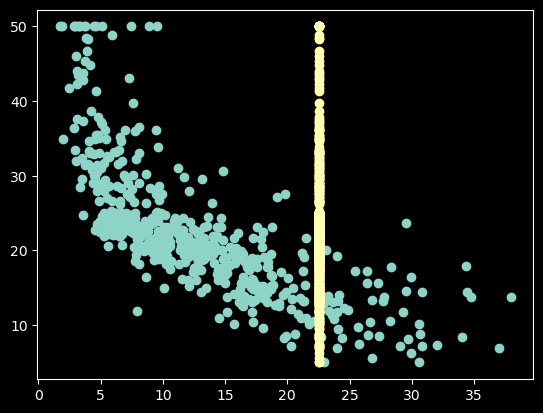

In [249]:
plt.scatter(X[:,12], Y);
plt.scatter(predict(X), Y);

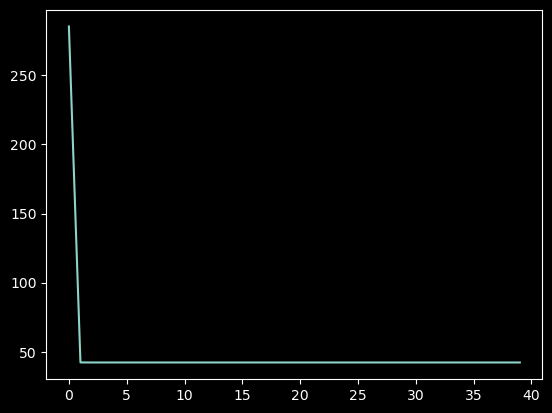

In [237]:
plt.plot(losses);

In [171]:
import seaborn as sns
df = sns.load_dataset("mpg")

In [172]:
X = df[["horsepower"]].values
Y = df[["acceleration"]].values

In [173]:
train(X,Y)

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (398,1)